In [1]:
# For file handeling
import pandas as pd
import numpy as np 

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

#for feature preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

#for clustering 
from sklearn.cluster import KMeans, DBSCAN

#Model Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [124]:
customer_data = pd.read_csv("data.csv")
customer_data.shape

(2240, 29)

In [125]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [126]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Dealing with missing values

In [127]:
# Dropping misisng values 
customer_data.dropna(inplace=True)

In [128]:
customer_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Feature Engineering

In [129]:
customer_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

*Deriving new feature "Age" from "Year_Birth"*

In [130]:
customer_data['Age'] = 2024 - customer_data['Year_Birth']

*Deriving new feature "Total_Spent"*

In [131]:
customer_data['Total_Spent'] = customer_data['MntWines'] + customer_data['MntFruits'] + customer_data['MntMeatProducts'] + customer_data['MntFishProducts'] + customer_data['MntSweetProducts'] + customer_data['MntGoldProds'] 

*Deriving new feature "children"*

In [132]:
customer_data['Children'] = customer_data['Kidhome'] + customer_data['Teenhome']

*Deriving new feature "living_with"*

In [133]:
customer_data['living_with'] = customer_data['Marital_Status'].replace({'Married':'Partner','Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'}) 

In [134]:
customer_data['living_with'] = customer_data['living_with'].map ({'Alone':0,'Partner':1})

*Deriving new feature "family_size"*

In [135]:
customer_data['family_size'] = customer_data['living_with'] + customer_data['Children'] + 1

*Deriving new feature "Is_Parent"*

In [136]:
customer_data['Is_Parent'] = np.where(customer_data['Children'] > 0, 1, 0)

*Segmenting "Education" feature in three group*

In [137]:
customer_data["Education"] = customer_data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

*Ordinal Encoding 'Education'*

In [138]:
customer_data['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [139]:
customer_data["Education"] = customer_data['Education'].map({'Graduate':1, 'Postgraduate':2, 'Undergraduate':0})

*Deriving feature married which represents if the customer is married or not (0 = Not married, 1 = Married)*

In [140]:
customer_data['Married'] = customer_data['Marital_Status'].map({'Single':0,'Together':0, 'Married':1, 'Divorced':0, 'Widow':0, 'Alone':0,
       'Absurd':0, 'YOLO':0}) 

*Dropping Redundant Features*

In [141]:
drop = ['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue','Marital_Status']

customer_add = customer_data.drop(drop, axis=1)

In [142]:
customer_add.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Children,living_with,family_size,Is_Parent,Married
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,1617,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,27,2,0,3,1,0
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,776,0,1,2,0,0
3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,53,1,1,3,1,0
4,2,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,422,1,1,3,1,1


# Capping Outliers

In [143]:
def outlier_cap(to_cap):
    for i in to_cap:
        Q3, Q1 = np.percentile(customer_add[i], [75,25])
        IQR = Q3-Q1
        up_lim = Q3 + 1.5 * IQR
        low_lim = Q1 - 1.5 * IQR

        outlier = ((customer_add[i] < low_lim) | (customer_add[i] > up_lim)).sum()

        print(f"{i} has {outlier} outliers.")

        customer_add[i] = np.where(customer_add[i]>up_lim, up_lim,
                        np.where(customer_add[i]<low_lim,low_lim,customer_add[i]))

        print(f"{outlier} values in {i} has been capped with {up_lim:.2f} for high outliers and {low_lim:.2f} for low outliers."'\n')

In [144]:
customer_add.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Spent',
       'Children', 'living_with', 'family_size', 'Is_Parent', 'Married'],
      dtype='object')

In [145]:
cap_fet = ['Income', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Age', 'Total_Spent']


In [146]:
outlier_cap(cap_fet)

Income has 8 outliers.
8 values in Income has been capped with 118350.50 for high outliers and -14525.50 for low outliers.

MntWines has 35 outliers.
35 values in MntWines has been capped with 1226.50 for high outliers and -697.50 for low outliers.

MntFruits has 246 outliers.
246 values in MntFruits has been capped with 79.50 for high outliers and -44.50 for low outliers.

MntMeatProducts has 174 outliers.
174 values in MntMeatProducts has been capped with 556.62 for high outliers and -308.38 for low outliers.

MntFishProducts has 222 outliers.
222 values in MntFishProducts has been capped with 120.50 for high outliers and -67.50 for low outliers.

MntSweetProducts has 246 outliers.
246 values in MntSweetProducts has been capped with 81.00 for high outliers and -47.00 for low outliers.

MntGoldProds has 205 outliers.
205 values in MntGoldProds has been capped with 126.50 for high outliers and -61.50 for low outliers.

Age has 3 outliers.
3 values in Age has been capped with 92.00 for 

# Scaling features

In [123]:
scaler = MinMaxScaler()

customer_data["Income"] = scaler.fit_transform(customer_data[["Income"]]) 

In [111]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# features = ["Income","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
#             "MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]

# customer_data[features] = scaler.fit_transform(customer_data[features]) 

In [115]:
customer_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,3.0,0.084832,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,3.0,0.067095,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,3.0,0.105097,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,3.0,0.037471,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,4.0,0.085065,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


# Data Visualization

In [147]:
customer_add.shape

(2216, 30)

In [148]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   float64
 6   MntFruits            2216 non-null   float64
 7   MntMeatProducts      2216 non-null   float64
 8   MntFishProducts      2216 non-null   float64
 9   MntSweetProducts     2216 non-null   float64
 10  MntGoldProds         2216 non-null   float64
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [149]:
customer_add.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Children,living_with,family_size,Is_Parent,Married
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1.267148,51874.493231,0.441787,0.505415,49.012635,303.272789,21.569043,151.268389,32.189079,21.950812,39.497518,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,55.132671,607.064305,0.947202,0.645307,2.592509,0.714350,0.386733
std,0.652084,21059.740890,0.536896,0.544181,28.948352,331.811951,26.923702,179.016404,40.411139,27.539044,39.874746,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.770856,602.865369,0.749062,0.478528,0.905722,0.451825,0.487112
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,1.000000,3.000000,1.000000,0.000000
75%,2.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,2.000000,118350.500000,2.000000,2.000000,99.000000,1226.500000,79.500000,556.625000,120.500000,81.000000,126.500000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,92.000000,2516.500000,3.000000,1.000000,5.000000,1.000000,1.000000


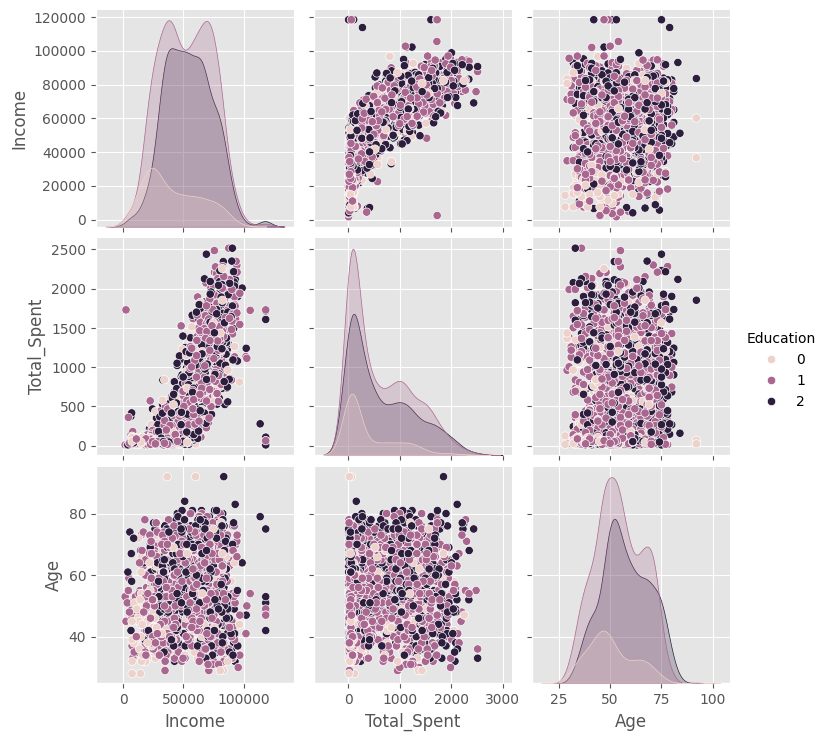

In [150]:
ax = sns.pairplot(customer_add, vars = ['Income','Total_Spent','Age'], hue = 'Education')
plt.show()

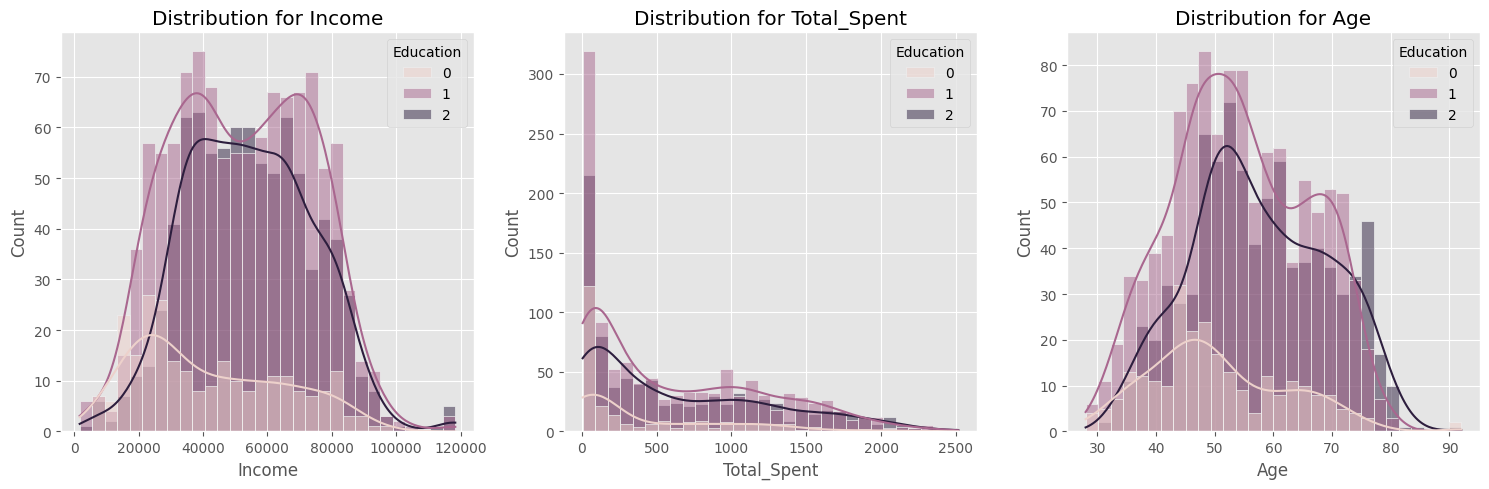

In [151]:
feature = ['Income','Total_Spent','Age']

plt.figure(figsize=(15,5))

for i in enumerate(feature):
    plt.subplot(1,3, i[0]+1)
    ax = sns.histplot(x = customer_add[i[1]], hue=customer_add['Education'], kde = True, bins=30)
    ax.set_title(f"Distribution for {i[1]}")
plt.tight_layout()
plt.show()

# K-mean

In [152]:
wcss = {}
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(customer_add)
    wcss[i]= km.inertia_

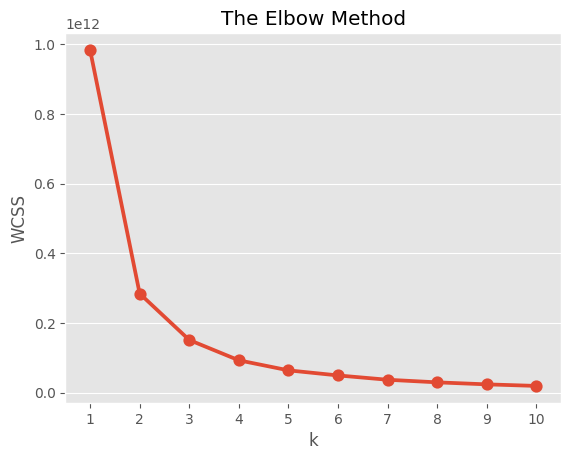

In [153]:
ax= sns.pointplot(x = list(wcss.keys()),y = list(wcss.values()))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [160]:
x = customer_add.values
km = KMeans(n_clusters = 3, random_state= 101)

In [161]:
km.fit(x)

KMeans(n_clusters=3, random_state=101)

In [162]:
customer_add['cluster'] = km.labels_

In [163]:
# Model evaluation

score = silhouette_score(customer_add, customer_add['cluster'])
db = davies_bouldin_score(customer_add, customer_add['cluster'])
ch = calinski_harabasz_score(customer_add, customer_add['cluster'])

print("Silhouette score:", score)
print("Davies-Bouldin Index:", db)
print("Calinski-Harabasz Index:", ch)


Silhouette score: 0.5442126866165884
Davies-Bouldin Index: 0.5482239239539933
Calinski-Harabasz Index: 6099.403519951906


# Cluster Visualization

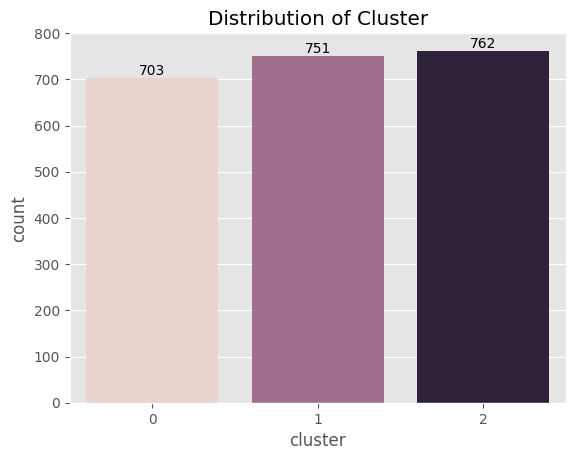

In [197]:
ax = sns.countplot(customer_add, x = 'cluster', hue='cluster', legend=False)
for i in ax.containers:
    ax.bar_label(i)
ax.set_title("Distribution of Cluster")
plt.show()

In [198]:
customer_add.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Spent',
       'Children', 'living_with', 'family_size', 'Is_Parent', 'Married',
       'cluster'],
      dtype='object')

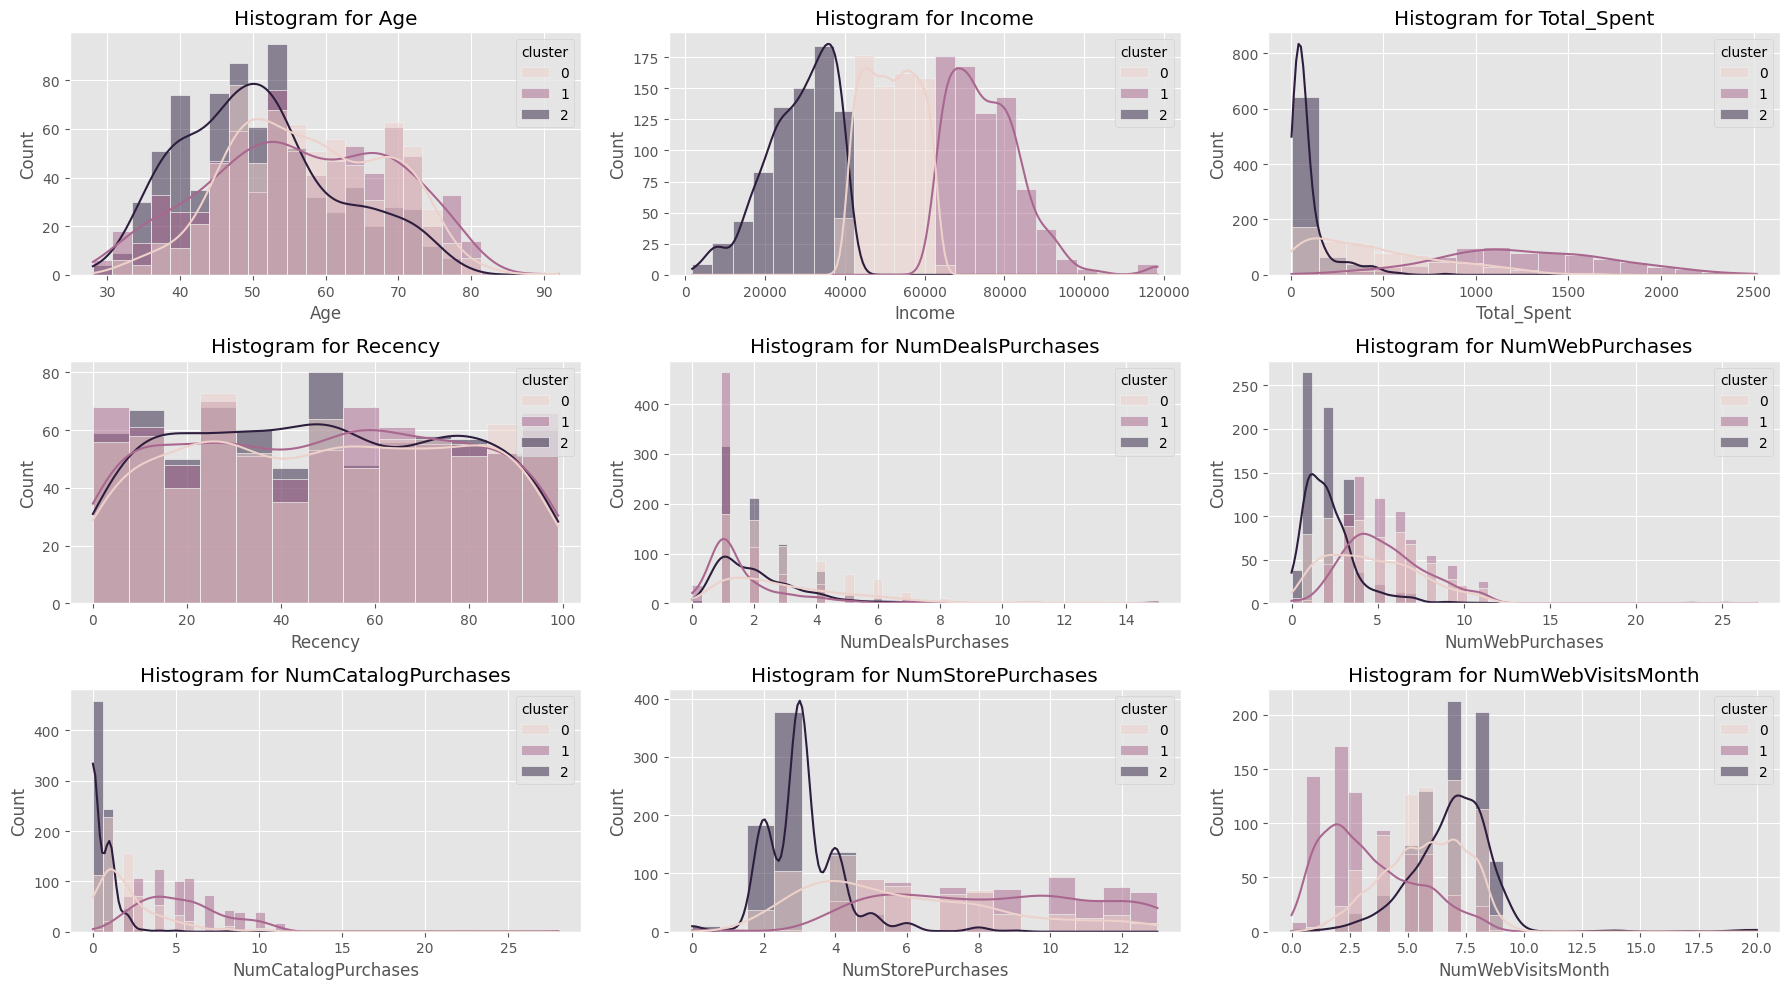

In [201]:
feature = ['Age','Income','Total_Spent','Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

plt.figure(figsize=(18,10))

for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    ax = sns.histplot(customer_add, x= i[1], hue = 'cluster', kde = 'True')
    ax.set_title(f"Histogram for {i[1]}")

plt.tight_layout()
plt.show()

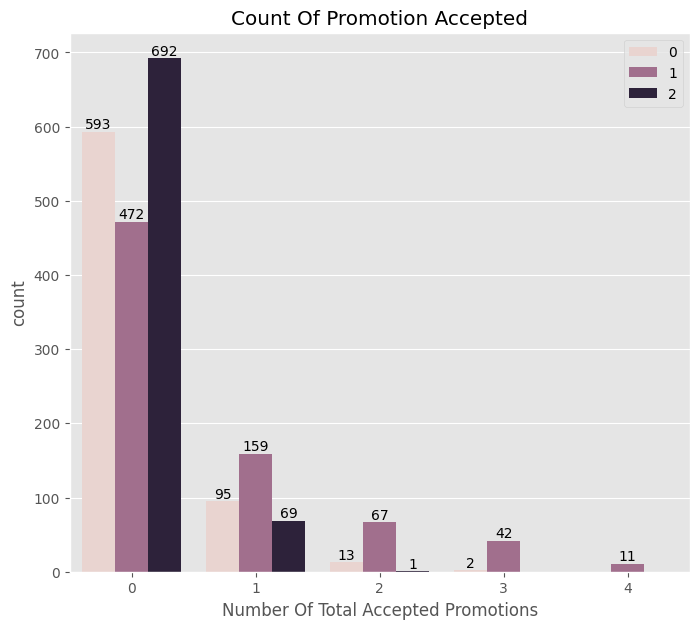

In [212]:
customer_add['Total_Promos'] = customer_add['AcceptedCmp1']+ customer_add['AcceptedCmp2']+ customer_add['AcceptedCmp3']+ customer_add['AcceptedCmp4']+ customer_add['AcceptedCmp5']

plt.figure(figsize=(8,7))
ax = sns.countplot(x=customer_add['Total_Promos'], hue=customer_add['cluster'])
ax.set_title('Count Of Promotion Accepted')
ax.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
for i in ax.containers:
    ax.bar_label(i)
plt.show()


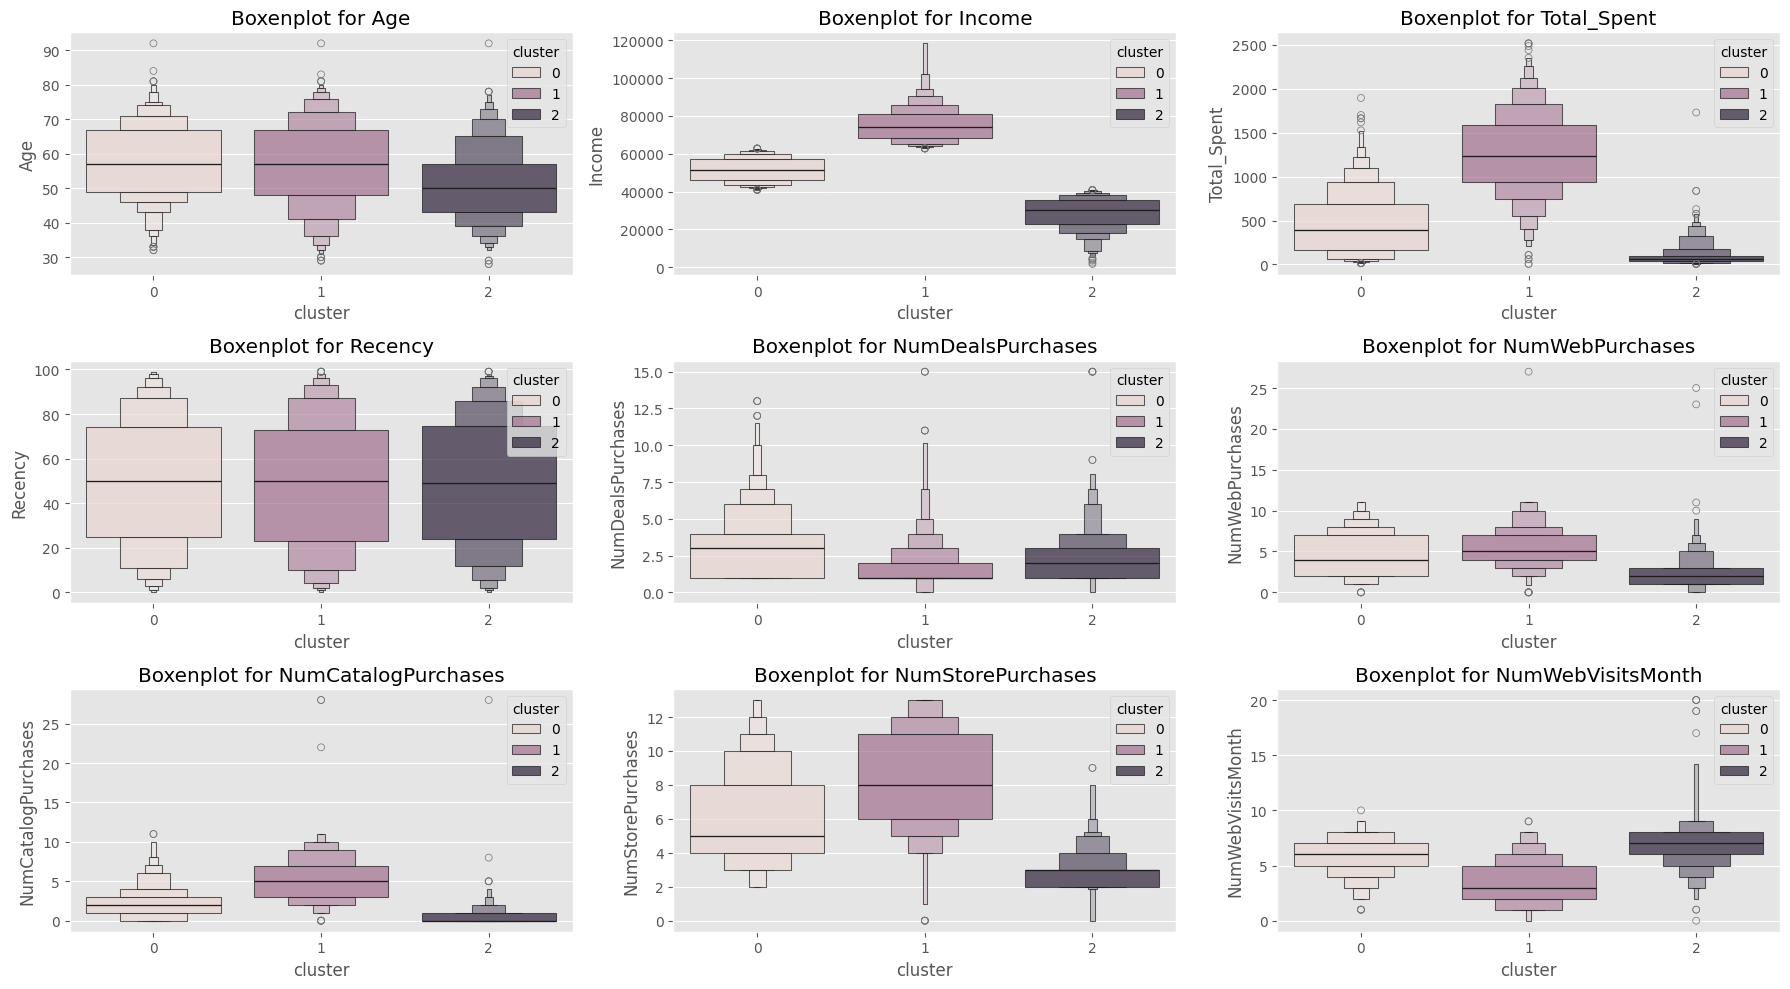

In [207]:
plt.figure(figsize=(18,10))

for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    ax = sns.boxenplot(x=customer_add['cluster'], y=customer_add[i[1]],  hue=customer_add['cluster'], alpha=0.7)
    ax.set_title(f"Boxenplot for {i[1]}")

plt.tight_layout()
plt.show()

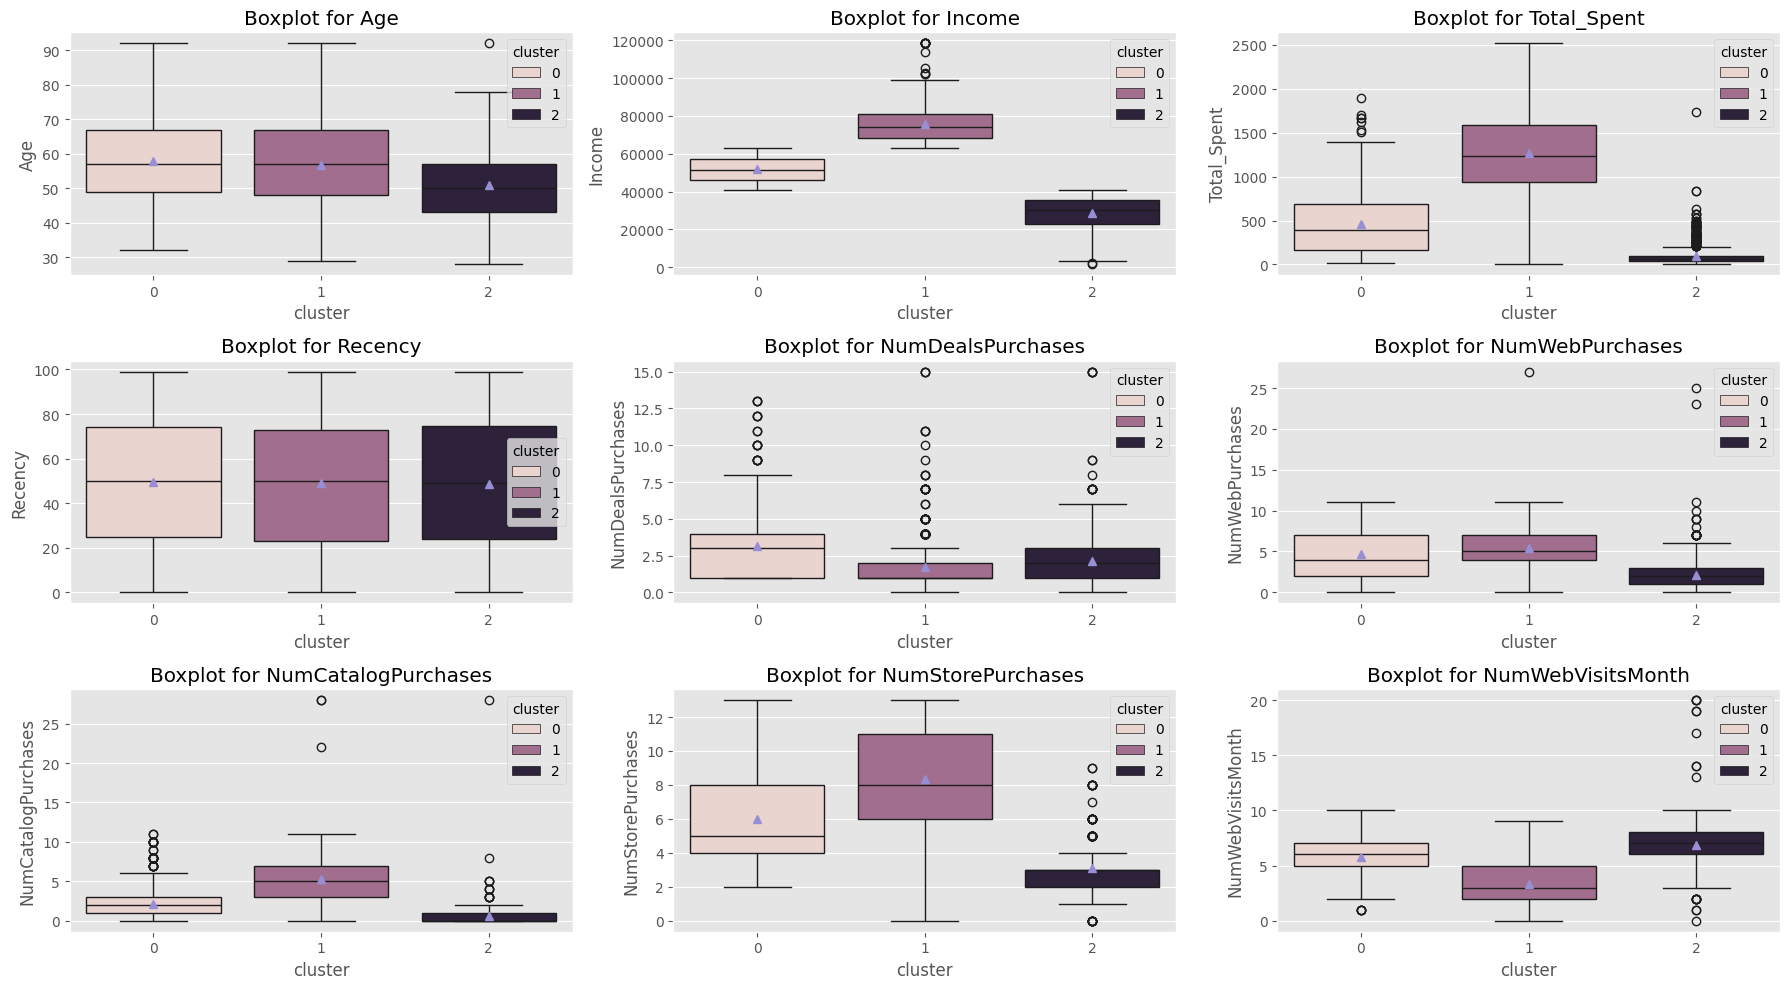

In [209]:
plt.figure(figsize=(18,10))

for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    ax = sns.boxplot(x=customer_add['cluster'], y=customer_add[i[1]],  hue=customer_add['cluster'], showmeans = True)
    ax.set_title(f"Boxplot for {i[1]}")

plt.tight_layout()
plt.show()

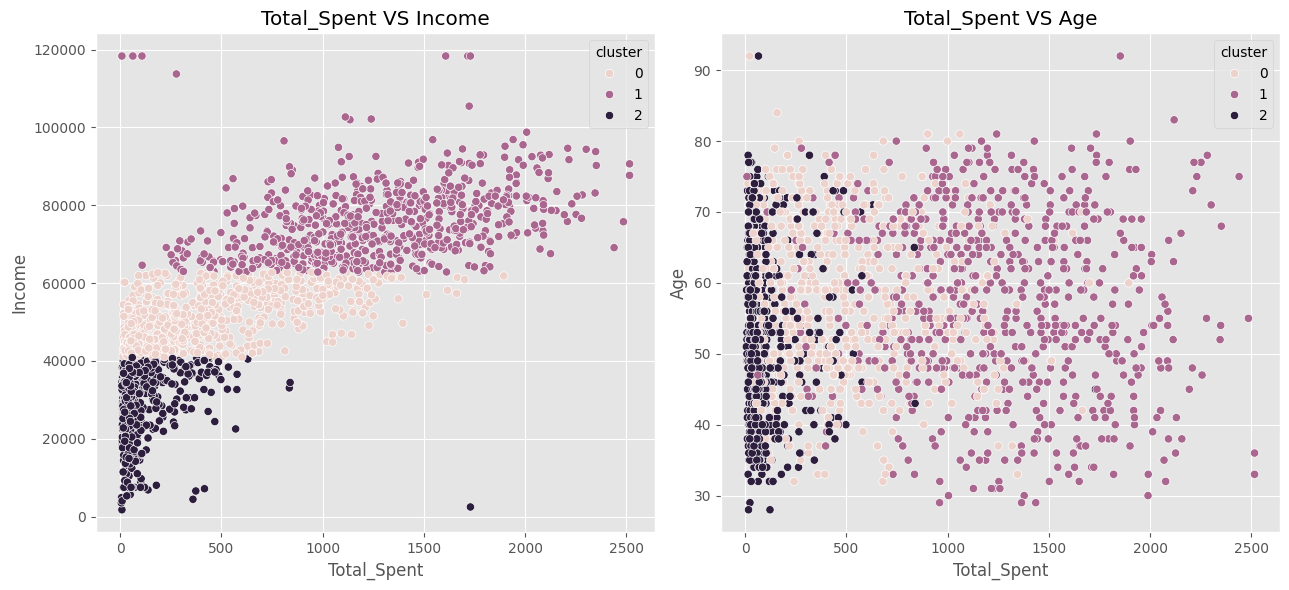

In [248]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(13,6))

sns.scatterplot(customer_add, x = 'Total_Spent', y = 'Income', hue='cluster', ax = ax1)
ax1.set_title("Total_Spent VS Income")

sns.scatterplot(customer_add, x = 'Total_Spent', y = 'Age', hue='cluster', ax = ax2)
ax2.set_title("Total_Spent VS Age")

plt.tight_layout()
plt.show()

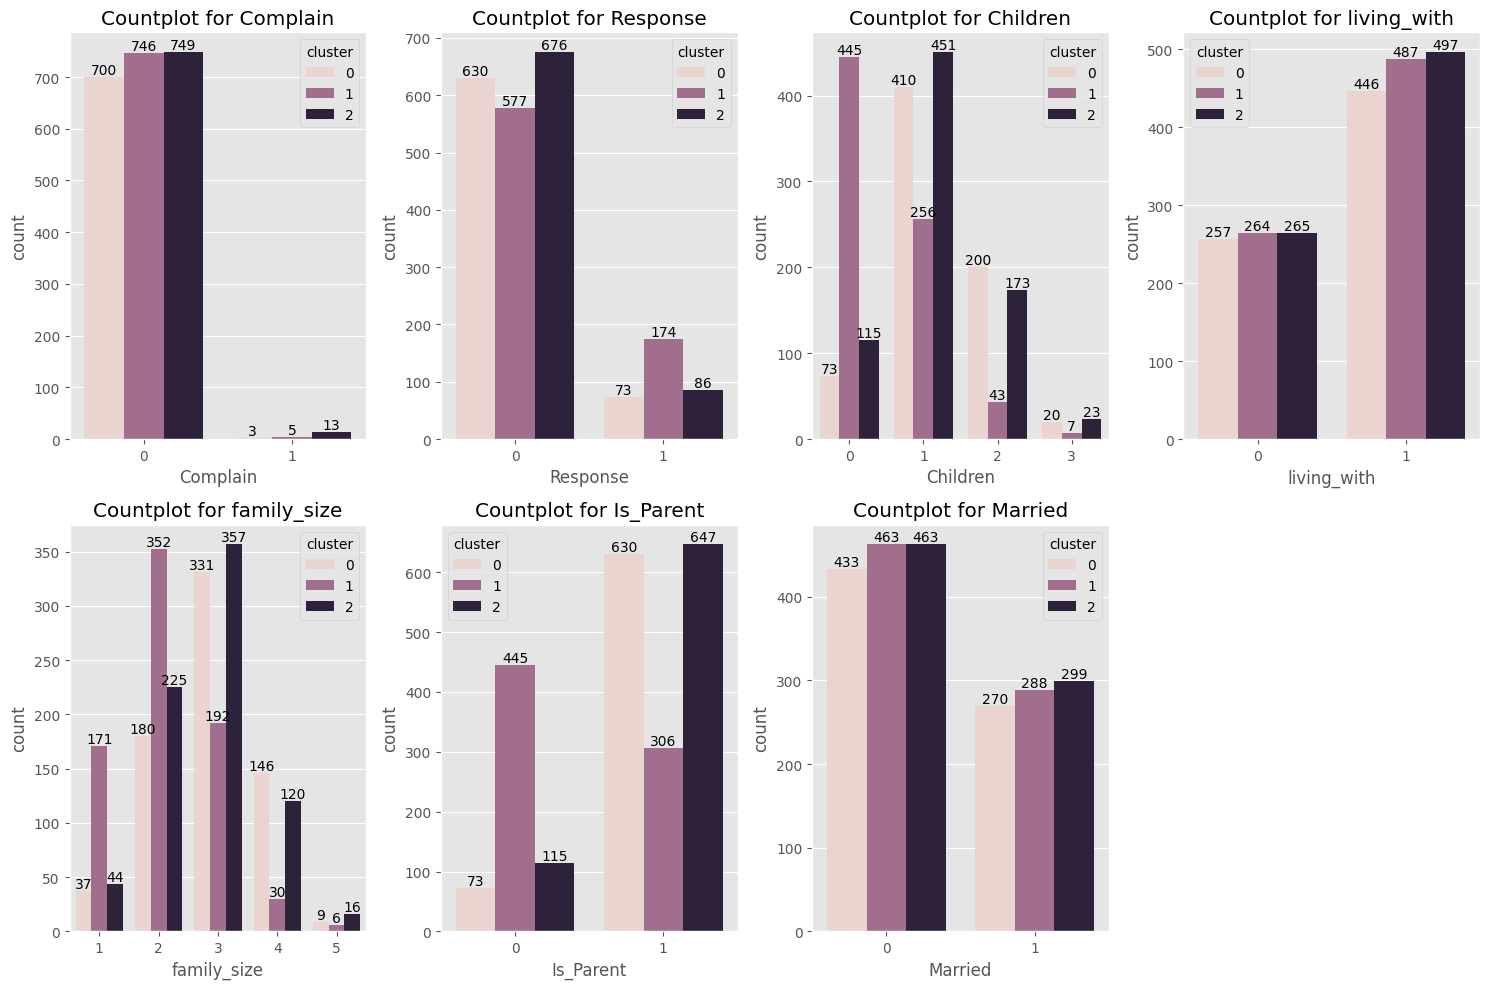

In [234]:
feature_2 = ['Complain', 'Response', 'Children', 'living_with', 'family_size', 'Is_Parent', 'Married']

plt.figure(figsize=(15,10))

for i in enumerate(feature_2):
    plt.subplot(2,4, i[0]+1)
    ax = sns.countplot(customer_add, x= i[1],  hue=customer_add['cluster'])
    for j in ax.containers:
        ax.bar_label(j)
    ax.set_title(f"Countplot for {i[1]}")

plt.tight_layout()
plt.show()

<center><h1 "font-weight: bold; font-family: Cursive">
Cluster Observation</h1></center>    

**Cluster 0**
- There are 730 unique customers in this cluster
- This cluster is in the middle range when in come to customer income and amount spent
- On average the number of deals purchase is higher in this cluster 
* `Age`:
    - The average age in this cluster is about 57 years old 
* `Income`:
    - The average yearly household income of customers in this cluster is about $50,000
* `Spent`:
    - Total spending for the last two years of customers in this cluster is on average $490 
* `Complain`:
    - This cluster has the lowest number of complain i.e. 3
* `Response`:
    - This cluster has the lowest response to campaings compared to other clusters
* `Is_Parent`:
    - This cluster has a really small group of non parent customer i.e. 73. 
* `Promotion Accepted`:
    - This cluster has a fair amount of accepted promotions with 127 promotion accepted

**Cluster 1**
- There are 751 unique customers in this cluster 
- This cluster is the top tier customers with high income and amount spent
- On aaverage the number of deals purchase in this cluster is lowest 
* `Age`:
    - The average age in this cluster is about 55 years old 
* `Income`:
    - The average yearly household income of customers in this cluster is about $750,000
* `Spent`:
    - Total spending for the last two years of customers in this cluster is on average $1250 
* `Complain`:
    - This cluster also has fairly few number of complain i.e. 5
* `Response`:
    - This cluster responds very well to campainge as 174 coverted to buying at the last campaing
* `Is_Parent`:
    - This cluster has the largest group of non parent customer i.e. 445. 
* `Promotion Accepted`:
    - This cluster has the highest amount of accepted promotions with 463 promotion accepted

**Cluster 2**
- There are 762 unique customers in this cluster
- This cluster is in the lowest range when in come to customer with the lowest income and amount spent
- On average the number of deals purchase is higher in this cluster so incentivising this cluster with more deals can be a good strategy. 
* `Age`:
    - The average age in this cluster is lowest i.e. 50 years old 
* `Income`:
    - The average yearly household income of customers in this cluster is about $30,000
* `Spent`:
    - Total spending for the last two years of customers in this cluster on average is only slightly above $0
* `Complain`:
    - This cluster has the largest number of complain i.e. 13
* `Response`:
    - This cluster has a fair response to campaings compared to other clusters
* `Is_Parent`:
    - This cluster has teh largest group of parent customer i.e. 647. 
* `Promotion Accepted`:
    - This cluster has the highest amount of rejected promotions with 692 promotion rejected

**Cluster Nature**
- In the cluster 0 are the customer that are fairly repatative but need more effective targeting and strategies to transform to loyal customers

- Cluster 1 is the ideal loyal customer with high purchase and income who most likely will continue spending and not much targeting is required.

- Cluster 2 has low spending but also have low income. This cluster seems to respond well to deals. Targeting this clusters with frequent deals could be a way to attract this segment of the customer

# Exploring a few more model for clustering 

# DBSCAN

In [239]:
dbscan = DBSCAN(eps=0.5, min_samples=3)

In [240]:
y_lbl = dbscan.fit_predict(x)

In [241]:
set(y_lbl)

{-1, 0, 1, 2, 3, 4, 5}

In [242]:
score = silhouette_score(x, y_lbl)
db = davies_bouldin_score(x, y_lbl)
ch = calinski_harabasz_score(x, y_lbl)

print("Silhouette score:", score)
print("Davies-Bouldin Index:", db)
print("Calinski-Harabasz Index:", ch)

Silhouette score: -0.7580272402830124
Davies-Bouldin Index: 1.0304901525291839
Calinski-Harabasz Index: 4.249458998733949


**DBSCAN is not well suited for this data set**

# K-Medoids Clustering

In [243]:
from sklearn_extra.cluster import KMedoids

In [244]:
Kmed = KMedoids(n_clusters = 3, random_state= 101)

In [245]:
Kmed.fit(x)

KMedoids(n_clusters=3, random_state=101)

In [246]:
customer_add['cluster'] = Kmed.labels_

In [247]:
score = silhouette_score(x, customer_add['cluster'])
db = davies_bouldin_score(x, customer_add['cluster'])
ch = calinski_harabasz_score(x, customer_add['cluster'])

print("Silhouette score:", score)
print("Davies-Bouldin Index:", db)
print("Calinski-Harabasz Index:", ch)

Silhouette score: 0.5399221408024186
Davies-Bouldin Index: 0.547363762370909
Calinski-Harabasz Index: 6025.901674737833
